# Statistics in Python 

In [1]:
# Import packages
import numpy as np
import pandas as pd


In [2]:
food_consumption = pd.read_csv('food_consumption.csv')
food_consumption


,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


In [3]:
food_consumption.drop(columns=['Unnamed: 0'])


,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,dairy,21.91,31.21
1426,Bangladesh,wheat,17.47,3.33
1427,Bangladesh,rice,171.73,219.76
1428,Bangladesh,soybeans,0.61,0.27


In [4]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


In [5]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == "Belgium") | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median])


,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


In [6]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt


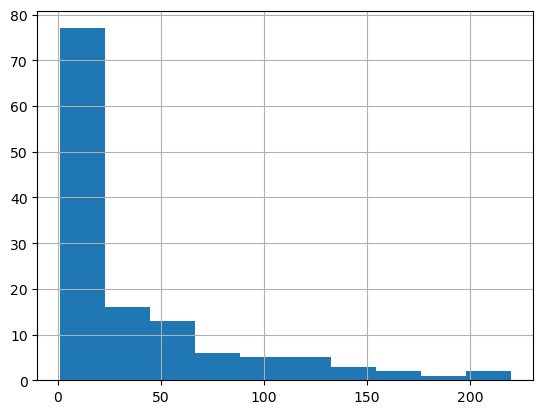

In [7]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()


In [8]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
rice_consumption['co2_emission'].agg([np.mean, np.median])
 

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

In [9]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))


[   0.        5.21     16.53     62.5975 1712.    ]


In [10]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))


[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [11]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))


[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


In [12]:
# Print variance and sd of co2_emission for each food_category
food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std])


,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


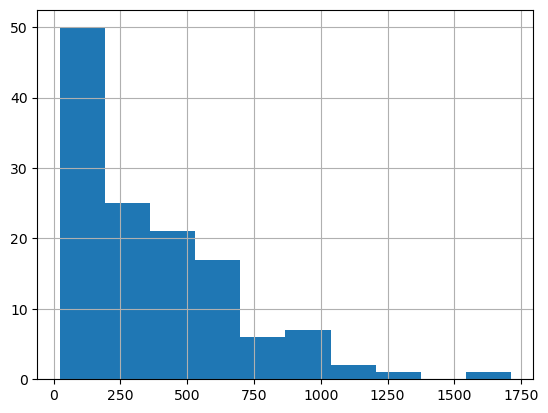

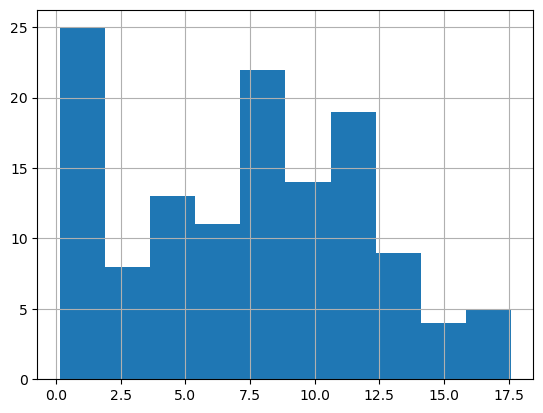

In [13]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

In [14]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
emissions_by_country


country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [15]:
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1
iqr


664.4925000000001

In [16]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(lower)
print(upper)


-550.0787500000001
2107.89125


In [17]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
outliers


country
Argentina    2172.4
Name: co2_emission, dtype: float64

In [18]:
amir_deals = pd.read_csv('amir_deals.csv')
amir_deals


,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...,...
173,174,Product A,Current,Lost,5835.32,23
174,175,Product D,Current,Won,6377.50,12
175,176,Product D,Current,Won,3537.61,28
176,177,Product A,Current,Won,6448.07,34


In [19]:
amir_deals = amir_deals.drop(columns=['Unnamed: 0'])
amir_deals

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17
...,...,...,...,...,...
173,Product A,Current,Lost,5835.32,23
174,Product D,Current,Won,6377.50,12
175,Product D,Current,Won,3537.61,28
176,Product A,Current,Won,6448.07,34


In [20]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
counts


Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

In [21]:
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
probs


Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64

In [22]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
sample_without_replacement


,product,client,status,amount,num_users
127,Product B,Current,Won,2070.25,7
148,Product D,Current,Won,3485.48,52
77,Product B,Current,Won,6252.30,27
104,Product D,Current,Won,4110.98,39
166,Product C,New,Lost,3779.86,11


In [23]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
sample_with_replacement


,product,client,status,amount,num_users
162,Product D,Current,Won,6755.66,59
131,Product B,Current,Won,6872.29,25
87,Product C,Current,Won,3579.63,3
145,Product A,Current,Won,4682.94,63
145,Product A,Current,Won,4682.94,63


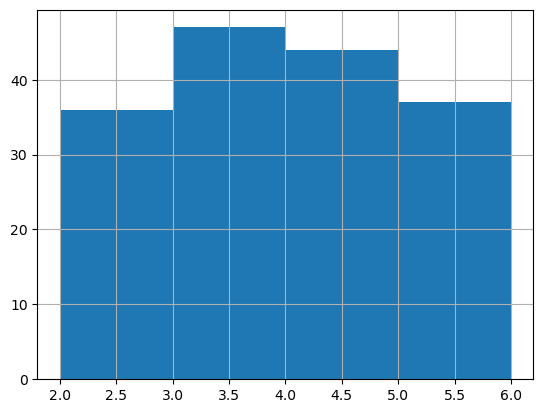

In [24]:
food_consumption['co2_emission'].hist(bins=np.linspace(2,6,5))
plt.show()


In [25]:
# Create probability distribution
size_dist = food_consumption['co2_emission'].value_counts() / food_consumption.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['co2_emission', 'prob']

size_dist


,co2_emission,prob
0,0.00,0.030769
1,0.02,0.010490
2,0.01,0.007692
3,0.04,0.004196
4,0.05,0.003497
...,...,...
1178,5.24,0.000699
1179,40.36,0.000699
1180,556.37,0.000699
1181,149.89,0.000699


In [26]:
# Expected value
expected_value = np.sum(size_dist['co2_emission'] * size_dist['prob'])
expected_value


74.383993006993

In [27]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['co2_emission'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['co2_emission'])
prob_4_or_more


102506.09

In [28]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30


In [29]:
# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
prob_less_than_5


0.16666666666666666

In [30]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
prob_greater_than_5


0.8333333333333334

In [31]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
prob_between_10_and_20


0.3333333333333333

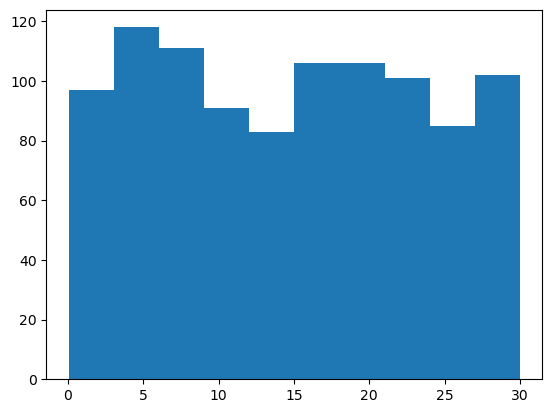

In [32]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

In [33]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)


In [34]:
# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))


[1]


In [35]:
# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))


[0]


In [36]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))


0.8461538461538461


In [37]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)


0.026999999999999996


In [38]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)


0.784


In [39]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)


0.21599999999999997


In [40]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


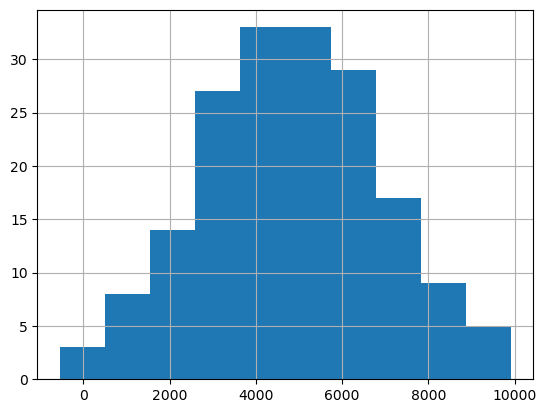

In [41]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()


In [42]:
from scipy.stats import norm


In [43]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)


0.8943502263331446


In [44]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)


0.9772498680518208


In [45]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)


0.6826894921370859


In [46]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)


3651.0204996078364


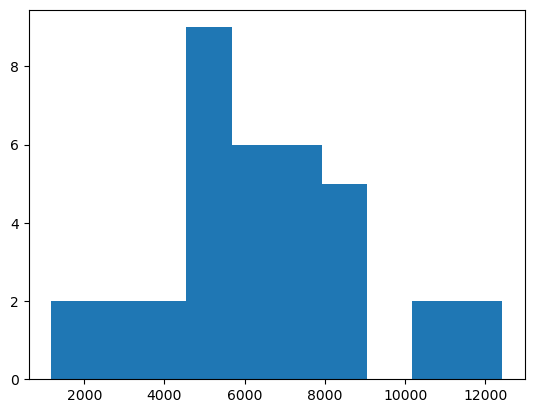

In [47]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()


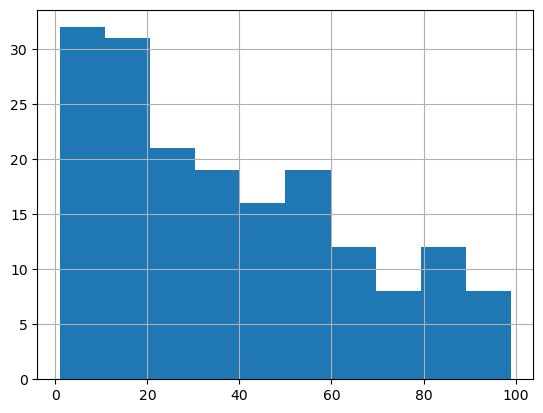

In [48]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show() 


In [49]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))


32.0


In [50]:
sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)


[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


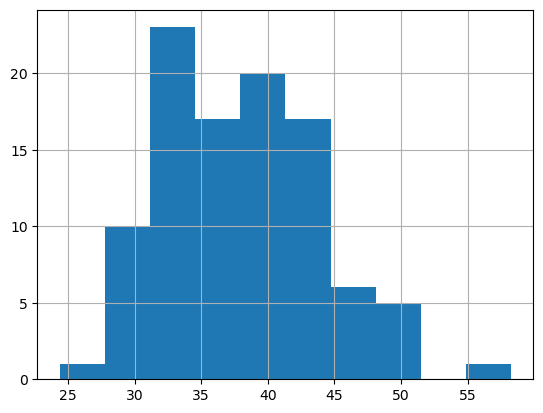

In [51]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()


In [52]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

prob_5


0.1562934518505317

In [53]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

prob_coworker


0.17140068409793663

In [54]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)


0.23810330555354436


In [55]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

prob_over_10


0.0028397661205137315

In [56]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))


0.3296799539643607


In [57]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))


0.20189651799465536


In [58]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))


0.09929769391754684


In [59]:
world_happiness = pd.read_csv('world_happiness.csv')
world_happiness


,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151
...,...,...,...,...,...,...,...,...,...
138,139,Rwanda,144.0,21.0,2.0,90.0,2110,69.1,4
139,140,Tanzania,131.0,78.0,34.0,49.0,2980,67.7,3
140,141,Afghanistan,151.0,155.0,136.0,137.0,1760,64.1,2
141,142,Central African Republic,155.0,133.0,122.0,113.0,794,52.9,1


In [60]:
world_happiness = world_happiness.drop(columns=['Unnamed: 0'])
world_happiness


,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151
...,...,...,...,...,...,...,...,...
138,Rwanda,144.0,21.0,2.0,90.0,2110,69.1,4
139,Tanzania,131.0,78.0,34.0,49.0,2980,67.7,3
140,Afghanistan,151.0,155.0,136.0,137.0,1760,64.1,2
141,Central African Republic,155.0,133.0,122.0,113.0,794,52.9,1


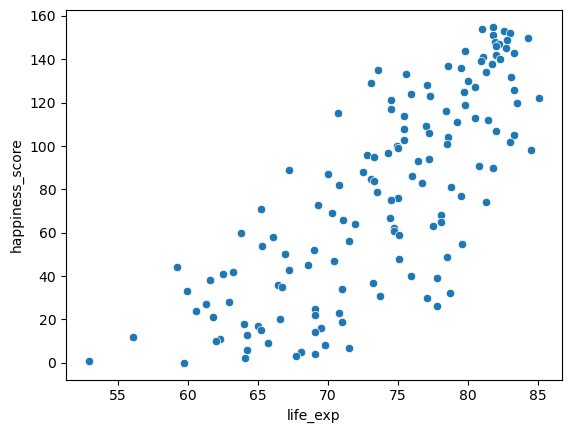

In [61]:
#import package
import seaborn as sns

# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Show plot
plt.show()


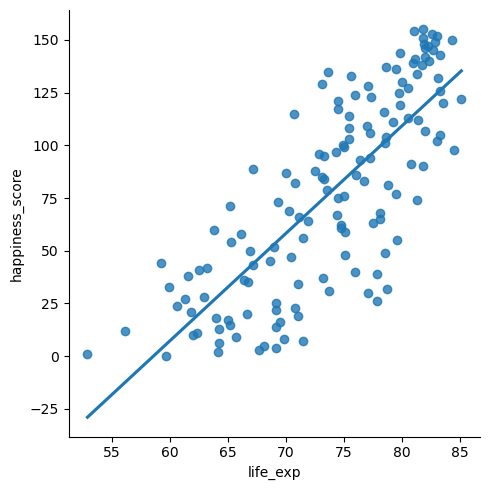

In [62]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()


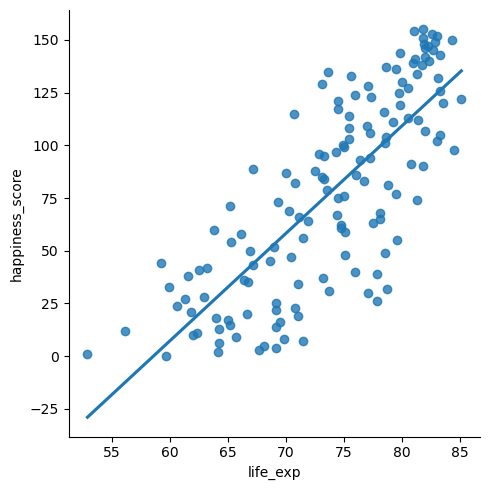

0.7802249053272062

In [63]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

cor

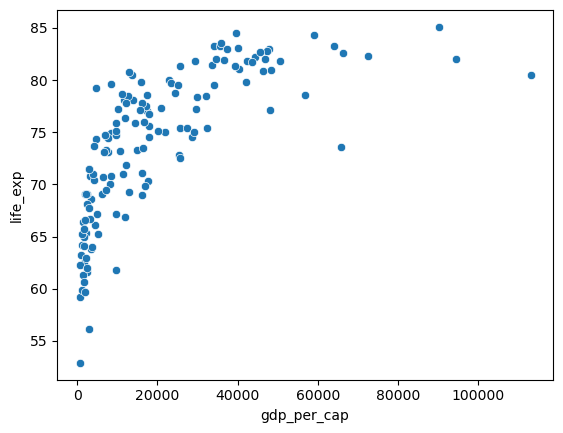

In [64]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()


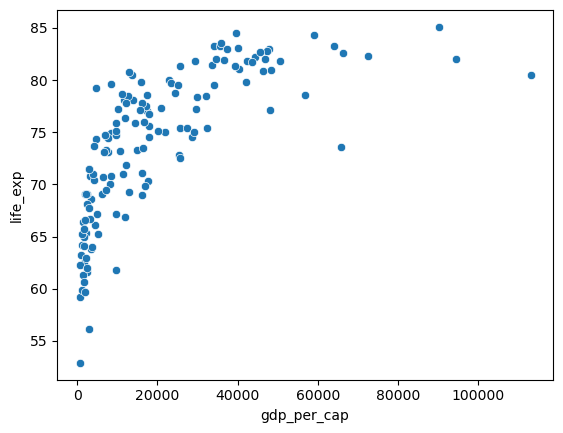

0.7019547642148015

In [65]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()
  
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

cor

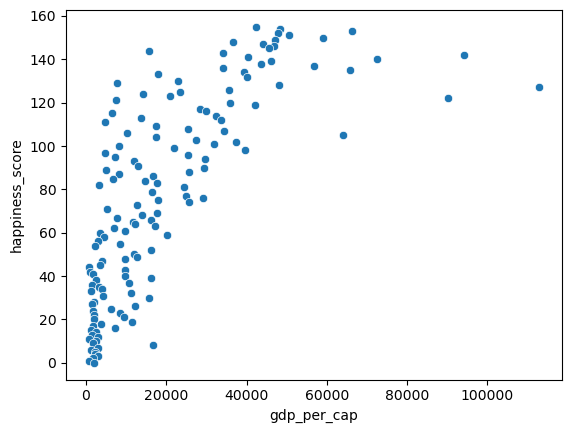

0.7279733012222975

In [66]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
cor


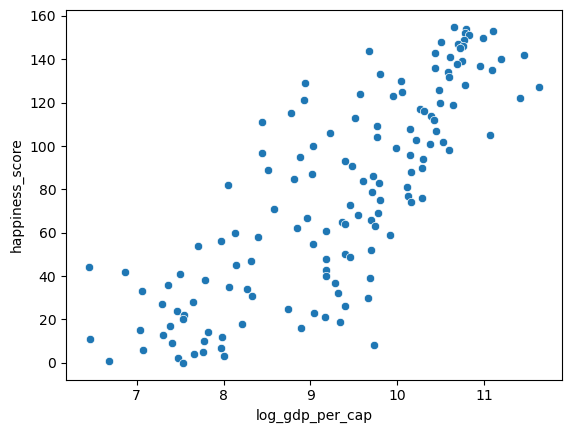

0.8043146004918288

In [67]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
cor
